<a href="https://colab.research.google.com/github/advaitha/D2AI/blob/main/Linear_regression_implementation_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of Linear regression in Tensorflow from scratch
[Source](https://d2l.ai/chapter_linear-networks/linear-regression-scratch.html)

In [ ]:
!pip install d2l

In [ ]:
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

In [ ]:
# Generate synthetic data
def synthetic_data(w , b, num_examples):
  X = tf.zeros((num_examples, w.shape[0]))
  X += tf.random.normal(shape=X.shape)
  y = tf.matmul(X,tf.reshape(w,(-1,1))) + b
  y += tf.random.normal(shape = y.shape, stddev=0.01)
  y = tf.reshape(y,(-1,1))
  return X, y

In [ ]:
true_w = tf.constant([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b,1000)

In [ ]:
print('features:',features[0], '\nlabel:',labels[0])

features: tf.Tensor([-0.5843595 -1.0234085], shape=(2,), dtype=float32) 
label: tf.Tensor([6.515165], shape=(1,), dtype=float32)


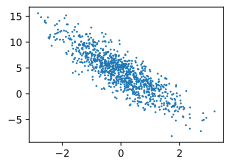

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].numpy(),labels.numpy(),1);

In [ ]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    j = tf.constant(indices[i:min(i + batch_size,num_examples)])
    yield tf.gather(features, j) , tf.gather(labels, j)

In [ ]:
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tf.Tensor(
[[ 1.1369059   1.0156785 ]
 [ 1.9847652   1.551511  ]
 [-0.17766148  1.9875604 ]
 [ 0.33767194 -1.7294147 ]
 [ 0.3809212   0.4417487 ]
 [-0.06129689 -0.73764575]
 [ 1.3659453  -0.9010649 ]
 [-1.3890564   1.7397952 ]
 [ 1.7332244   0.3763583 ]
 [-0.86179954 -2.4695828 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 3.0211961]
 [ 2.8889341]
 [-2.9144504]
 [10.744904 ]
 [ 3.4431663]
 [ 6.5843596]
 [ 9.990712 ]
 [-4.504623 ]
 [ 6.3812323]
 [10.884846 ]], shape=(10, 1), dtype=float32)


In [ ]:
w = tf.Variable(tf.random.normal(shape = (2,1), mean = 0, stddev = 0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1),trainable=True)

In [ ]:
def linreg(X, w, b):
  return tf.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat,y):
  return (y_hat - tf.reshape(y, y_hat.shape))**2 / 2 

In [ ]:
def sgd(params, grads, lr, batch_size):
  for param, grad in zip(params, grads):
    param.assign_sub(lr * grad / batch_size)

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    with tf.GradientTape() as g:
      l = loss(net(X,w,b),y)
      dw, db = g.gradient(l,[w,b])
      sgd([w,b],[dw,db],lr, batch_size)
  train_l = loss(net(features, w, b), labels)
  print(f'epoch {epoch+1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.042803
epoch 2, loss 0.000162
epoch 3, loss 0.000048


In [ ]:
print(f'error in esitmating w: {true_w - tf.reshape(w,true_w.shape)}')
print(f'error in estimating b:{true_b -b}')

error in esitmating w: [ 0.0002991  -0.00011492]
error in estimating b:[0.00041723]
